In [1]:
import sqlite3
import pandas as pd
import matplotlib.dates as dates
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

import Cdf

In [2]:
params = {'axes.labelsize' : 14, 'axes.titlesize' : 14,
          'font.size' : 14, 'legend.fontsize' : 14,
          'xtick.labelsize' : 14, 'ytick.labelsize' : 14}
plt.rcParams.update(params)

In [3]:
conn = sqlite3.connect('../data/netflix-data-aggregated.db')

netflix = pd.read_sql_query('select * from netflix_meta',
                            con=conn, parse_dates=['dtime'])

traceroute = pd.read_sql_query('select * from traceroute_meta',
                                con=conn, parse_dates=['dtime'])

conn.close()

In [4]:
netflix['delta_connect_time'] = netflix['delta_connect_time']/1000.0

In [5]:
for df in [netflix, traceroute]:
    df['v4_cache'] = df['src_asn_v4'] == df['dst_asn_v4']
    df['v6_cache'] = df['src_asn_v6'] == df['dst_asn_v6']

In [6]:
netflix_v4_cache = netflix[netflix['v4_cache'] & ~netflix['v6_cache']]
netflix_v6_cache = netflix[~netflix['v4_cache'] & netflix['v6_cache']]
netflix_neither_caches = netflix[~netflix['v4_cache'] & ~netflix['v6_cache']]
netflix_both_caches = netflix[netflix['v4_cache'] & netflix['v6_cache']]

In [7]:
netflix_v4_cache

,unit_id,dtime,src_asn_v4,src_holder_v4,address_v4,dst_asn_v4,dst_holder_v4,connect_time_v4,bytes_sec_v4,src_asn_v6,src_holder_v6,address_v6,dst_asn_v6,dst_holder_v6,connect_time_v6,bytes_sec_v6,delta_connect_time,delta_bytes_sec,v4_cache,v6_cache
23955,123256,2017-02-11 06:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,17885,6067178,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:117:117::203,2906,AS-SSI - Netflix Streaming Services Inc.,25914,6043627,-8.029,23551,True,False
23956,123256,2017-02-11 12:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,18154,5772754,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:117:117::203,2906,AS-SSI - Netflix Streaming Services Inc.,38020,3038215,-19.866,2734539,True,False
23957,123256,2017-02-11 14:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,18004,5795930,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:117:117::203,2906,AS-SSI - Netflix Streaming Services Inc.,45989,2651353,-27.985,3144577,True,False
23958,123256,2017-02-11 15:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,18356,6100802,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:117:117::203,2906,AS-SSI - Netflix Streaming Services Inc.,32986,2643680,-14.630,3457122,True,False
23959,123256,2017-02-11 22:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,19837,6080776,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:117:117::203,2906,AS-SSI - Netflix Streaming Services Inc.,42315,3072288,-22.478,3008488,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968786,950202,2018-11-15 15:00:00,4739,INTERNODE-AS Internode Pty Ltd,150.101.40.102,4739,INTERNODE-AS Internode Pty Ltd,38321,2200315,4739,INTERNODE-AS Internode Pty Ltd,2001:4478:1:1::806,4802,ASN-IINET iiNet Limited,27079,2185252,11.242,15063,True,False
968787,950202,2019-01-07 21:00:00,4739,INTERNODE-AS Internode Pty Ltd,150.101.40.102,4739,INTERNODE-AS Internode Pty Ltd,37982,2197501,4739,INTERNODE-AS Internode Pty Ltd,2001:4478:1:1::806,4802,ASN-IINET iiNet Limited,26710,2178584,11.272,18917,True,False
968788,950202,2018-02-18 05:00:00,4739,INTERNODE-AS Internode Pty Ltd,150.101.199.225,4739,INTERNODE-AS Internode Pty Ltd,43320,2183500,4739,INTERNODE-AS Internode Pty Ltd,2001:4478:1:1::601,4802,ASN-IINET iiNet Limited,37932,2174145,5.388,9355,True,False
968789,950202,2018-02-05 10:00:00,4739,INTERNODE-AS Internode Pty Ltd,150.101.41.101,4739,INTERNODE-AS Internode Pty Ltd,38360,2182089,4739,INTERNODE-AS Internode Pty Ltd,2001:4478:1:1::601,4802,ASN-IINET iiNet Limited,42459,2134084,-4.099,48005,True,False


In [8]:
netflix_v6_cache

,unit_id,dtime,src_asn_v4,src_holder_v4,address_v4,dst_asn_v4,dst_holder_v4,connect_time_v4,bytes_sec_v4,src_asn_v6,src_holder_v6,address_v6,dst_asn_v6,dst_holder_v6,connect_time_v6,bytes_sec_v6,delta_connect_time,delta_bytes_sec,v4_cache,v6_cache
144779,123256,2017-01-24 13:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,45.57.19.136,2906,AS-SSI - Netflix Streaming Services Inc.,198485,1813165,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,17822,5933628,180.663,-4120463,False,True
144780,123256,2017-01-24 15:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,45.57.19.136,2906,AS-SSI - Netflix Streaming Services Inc.,196892,1811600,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,18109,5762700,178.783,-3951100,False,True
144781,123256,2017-01-24 20:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,45.57.19.136,2906,AS-SSI - Netflix Streaming Services Inc.,201527,1789711,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,18219,6143964,183.308,-4354253,False,True
144782,123256,2017-01-25 00:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,45.57.19.136,2906,AS-SSI - Netflix Streaming Services Inc.,195519,355557,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,17318,3738957,178.201,-3383400,False,True
144783,123256,2017-01-25 04:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,45.57.19.136,2906,AS-SSI - Netflix Streaming Services Inc.,194918,1847173,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,18064,6137738,176.854,-4290565,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916774,660120,2017-04-03 06:00:00,5645,TEKSAVVY - TekSavvy Solutions,198.38.109.168,2906,AS-SSI - Netflix Streaming Services Inc.,17166,1839060,5645,TEKSAVVY - TekSavvy Solutions,2607:f2c0:1:3:0:ae:3247:4,5645,TEKSAVVY - TekSavvy Solutions,6594,1809204,10.572,29856,False,True
916775,660120,2017-04-07 13:00:00,5645,TEKSAVVY - TekSavvy Solutions,198.38.109.168,2906,AS-SSI - Netflix Streaming Services Inc.,17135,1845515,5645,TEKSAVVY - TekSavvy Solutions,2607:f2c0:1:3:0:ae:3247:4,5645,TEKSAVVY - TekSavvy Solutions,6881,1799320,10.254,46195,False,True
916776,660120,2017-04-09 14:00:00,5645,TEKSAVVY - TekSavvy Solutions,198.38.109.168,2906,AS-SSI - Netflix Streaming Services Inc.,17013,1841335,5645,TEKSAVVY - TekSavvy Solutions,2607:f2c0:1:3:0:ae:3247:4,5645,TEKSAVVY - TekSavvy Solutions,7041,1805885,9.972,35450,False,True
916777,660120,2017-04-11 12:00:00,5645,TEKSAVVY - TekSavvy Solutions,198.38.109.168,2906,AS-SSI - Netflix Streaming Services Inc.,17310,1833511,5645,TEKSAVVY - TekSavvy Solutions,2607:f2c0:1:3:0:ae:3247:4,5645,TEKSAVVY - TekSavvy Solutions,6857,1797990,10.453,35521,False,True


In [9]:
netflix_neither_caches

,unit_id,dtime,src_asn_v4,src_holder_v4,address_v4,dst_asn_v4,dst_holder_v4,connect_time_v4,bytes_sec_v4,src_asn_v6,src_holder_v6,address_v6,dst_asn_v6,dst_holder_v6,connect_time_v6,bytes_sec_v6,delta_connect_time,delta_bytes_sec,v4_cache,v6_cache
0,123256,2016-07-22 00:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,20515,10371717,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,16803,10674265,3.712,-302548,False,False
1,123256,2016-07-25 00:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,16457,10272516,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,17265,10867458,-0.808,-594942,False,False
2,123256,2016-12-15 23:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,18057,9869233,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,17221,10550408,0.836,-681175,False,False
3,148650,2016-10-04 18:00:00,3320,DTAG - Deutsche Telekom AG,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,26762,4514214,3320,DTAG - Deutsche Telekom AG,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,26208,4415574,0.554,98640,False,False
4,950210,2018-03-08 20:00:00,3320,DTAG - Deutsche Telekom AG,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,26690,1774382,3320,DTAG - Deutsche Telekom AG,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,26973,1756487,-0.283,17895,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968394,950236,2017-06-11 03:00:00,7922,COMCAST-7922 - Comcast Cable Communications,198.38.109.131,2906,AS-SSI - Netflix Streaming Services Inc.,20727,2382495,7922,COMCAST-7922 - Comcast Cable Communications,2a00:86c0:108:108::182,2906,AS-SSI - Netflix Streaming Services Inc.,19281,2351147,1.446,31348,False,False
968395,950240,2017-01-25 22:00:00,20375,TEKSAVVY-WEST - TekSavvy Solutions,76.10.191.86,5645,TEKSAVVY - TekSavvy Solutions,7922,2742660,20375,TEKSAVVY-WEST - TekSavvy Solutions,2a00:86c0:1043:1043::132,2906,AS-SSI - Netflix Streaming Services Inc.,80126,1646243,-72.204,1096417,False,False
968396,950240,2017-01-26 06:00:00,20375,TEKSAVVY-WEST - TekSavvy Solutions,76.10.191.86,5645,TEKSAVVY - TekSavvy Solutions,8881,3058512,20375,TEKSAVVY-WEST - TekSavvy Solutions,2a00:86c0:1043:1043::133,2906,AS-SSI - Netflix Streaming Services Inc.,81378,1250868,-72.497,1807644,False,False
968397,950240,2017-02-16 17:00:00,20375,TEKSAVVY-WEST - TekSavvy Solutions,76.10.191.86,5645,TEKSAVVY - TekSavvy Solutions,7029,2838652,20375,TEKSAVVY-WEST - TekSavvy Solutions,2a00:86c0:1043:1043::135,2906,AS-SSI - Netflix Streaming Services Inc.,80289,3019548,-73.260,-180896,False,False


In [10]:
netflix_both_caches

,unit_id,dtime,src_asn_v4,src_holder_v4,address_v4,dst_asn_v4,dst_holder_v4,connect_time_v4,bytes_sec_v4,src_asn_v6,src_holder_v6,address_v6,dst_asn_v6,dst_holder_v6,connect_time_v6,bytes_sec_v6,delta_connect_time,delta_bytes_sec,v4_cache,v6_cache
134597,123256,2017-01-23 22:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,18364,4331227,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,17550,4065494,0.814,265733,True,True
134598,123256,2017-01-24 00:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,18679,6181845,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,18290,6187927,0.389,-6082,True,True
134599,123256,2017-01-24 03:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,18438,5766906,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,17782,5704976,0.656,61930,True,True
134600,123256,2017-01-24 04:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,18010,5759127,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,17798,6140109,0.212,-380982,True,True
134601,123256,2017-01-24 05:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,17825,6094271,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,17748,5831651,0.077,262620,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969503,661028,2017-10-09 06:00:00,14877,PENNREN - KINBER,162.223.18.131,14877,PENNREN - KINBER,10425,9708303,14877,PENNREN - KINBER,2607:3180:b000:3::a,14877,PENNREN - KINBER,10522,10853290,-0.097,-1144987,True,True
969504,661028,2017-10-09 07:00:00,14877,PENNREN - KINBER,162.223.18.131,14877,PENNREN - KINBER,10384,9921601,14877,PENNREN - KINBER,2607:3180:b000:3::a,14877,PENNREN - KINBER,10550,9709498,-0.166,212103,True,True
969505,661028,2017-10-18 06:00:00,14877,PENNREN - KINBER,162.223.18.131,14877,PENNREN - KINBER,10499,10911879,14877,PENNREN - KINBER,2607:3180:b000:3::a,14877,PENNREN - KINBER,10550,10648217,-0.051,263662,True,True
969506,661028,2017-10-18 07:00:00,14877,PENNREN - KINBER,162.223.18.131,14877,PENNREN - KINBER,10513,9953607,14877,PENNREN - KINBER,2607:3180:b000:3::a,14877,PENNREN - KINBER,10445,9987885,0.068,-34278,True,True


In [11]:
traceroute_v4_cache = traceroute[traceroute['v4_cache'] & ~traceroute['v6_cache']]
traceroute_v6_cache = traceroute[~traceroute['v4_cache'] & traceroute['v6_cache']]
traceroute_neither_caches = traceroute[~traceroute['v4_cache'] & ~traceroute['v6_cache']]
traceroute_both_caches = traceroute[traceroute['v4_cache'] & traceroute['v6_cache']]

In [12]:
traceroute_v4_cache

,unit_id,dtime,src_asn_v4,src_holder_v4,destination_v4,dst_asn_v4,dst_holder_v4,ttl_v4,rtt_v4,src_asn_v6,src_holder_v6,destination_v6,dst_asn_v6,dst_holder_v6,ttl_v6,rtt_v6,delta_ttl,delta_rtt,v4_cache,v6_cache
22913,123256,2017-02-11 06:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,4,17.583,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:117:117::203,2906,AS-SSI - Netflix Streaming Services Inc.,6,28.462,-2,-10.879,True,False
22914,123256,2017-02-11 12:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,4,17.137,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:117:117::203,2906,AS-SSI - Netflix Streaming Services Inc.,6,31.482,-2,-14.345,True,False
22915,123256,2017-02-11 14:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,4,17.495,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:117:117::203,2906,AS-SSI - Netflix Streaming Services Inc.,6,31.502,-2,-14.007,True,False
22916,123256,2017-02-11 15:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,4,16.993,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:117:117::203,2906,AS-SSI - Netflix Streaming Services Inc.,6,35.700,-2,-18.707,True,False
22917,123256,2017-02-11 22:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,4,17.582,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:117:117::203,2906,AS-SSI - Netflix Streaming Services Inc.,6,37.455,-2,-19.873,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888621,950202,2018-03-31 10:00:00,4739,INTERNODE-AS Internode Pty Ltd,150.101.199.53,4739,INTERNODE-AS Internode Pty Ltd,6,41.980,4739,INTERNODE-AS Internode Pty Ltd,2001:4478:1:1::603,4802,ASN-IINET iiNet Limited,6,37.369,0,4.611,True,False
888622,950202,2017-09-09 10:00:00,4739,INTERNODE-AS Internode Pty Ltd,150.101.41.105,4739,INTERNODE-AS Internode Pty Ltd,8,37.292,4739,INTERNODE-AS Internode Pty Ltd,2001:4478:1:1::603,4802,ASN-IINET iiNet Limited,8,39.625,0,-2.333,True,False
888623,950202,2018-01-25 10:00:00,4739,INTERNODE-AS Internode Pty Ltd,150.101.41.105,4739,INTERNODE-AS Internode Pty Ltd,6,37.839,4739,INTERNODE-AS Internode Pty Ltd,2001:4478:1:1::603,4802,ASN-IINET iiNet Limited,6,38.122,0,-0.283,True,False
888624,950202,2018-02-25 08:00:00,4739,INTERNODE-AS Internode Pty Ltd,150.101.41.105,4739,INTERNODE-AS Internode Pty Ltd,6,37.591,4739,INTERNODE-AS Internode Pty Ltd,2001:4478:1:1::603,4802,ASN-IINET iiNet Limited,6,38.533,0,-0.942,True,False


In [13]:
traceroute_v6_cache

,unit_id,dtime,src_asn_v4,src_holder_v4,destination_v4,dst_asn_v4,dst_holder_v4,ttl_v4,rtt_v4,src_asn_v6,src_holder_v6,destination_v6,dst_asn_v6,dst_holder_v6,ttl_v6,rtt_v6,delta_ttl,delta_rtt,v4_cache,v6_cache
129543,123256,2017-01-24 13:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,45.57.19.136,2906,AS-SSI - Netflix Streaming Services Inc.,31,199.554,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,4,16.700,27,182.854,False,True
129544,123256,2017-01-24 15:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,45.57.19.136,2906,AS-SSI - Netflix Streaming Services Inc.,25,197.731,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,4,17.473,21,180.258,False,True
129545,123256,2017-01-24 20:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,45.57.19.136,2906,AS-SSI - Netflix Streaming Services Inc.,25,197.528,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,4,17.145,21,180.383,False,True
129546,123256,2017-01-25 00:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,45.57.19.136,2906,AS-SSI - Netflix Streaming Services Inc.,25,200.404,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,4,17.013,21,183.391,False,True
129547,123256,2017-01-25 04:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,45.57.19.136,2906,AS-SSI - Netflix Streaming Services Inc.,25,195.017,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,4,16.694,21,178.323,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831011,660120,2017-04-03 06:00:00,5645,TEKSAVVY - TekSavvy Solutions,198.38.109.168,2906,AS-SSI - Netflix Streaming Services Inc.,8,15.838,5645,TEKSAVVY - TekSavvy Solutions,2607:f2c0:1:3:0:ae:3247:4,5645,TEKSAVVY - TekSavvy Solutions,4,6.637,4,9.201,False,True
831012,660120,2017-04-07 13:00:00,5645,TEKSAVVY - TekSavvy Solutions,198.38.109.168,2906,AS-SSI - Netflix Streaming Services Inc.,7,16.547,5645,TEKSAVVY - TekSavvy Solutions,2607:f2c0:1:3:0:ae:3247:4,5645,TEKSAVVY - TekSavvy Solutions,4,6.355,3,10.192,False,True
831013,660120,2017-04-09 14:00:00,5645,TEKSAVVY - TekSavvy Solutions,198.38.109.168,2906,AS-SSI - Netflix Streaming Services Inc.,7,16.593,5645,TEKSAVVY - TekSavvy Solutions,2607:f2c0:1:3:0:ae:3247:4,5645,TEKSAVVY - TekSavvy Solutions,4,6.668,3,9.925,False,True
831014,660120,2017-04-11 12:00:00,5645,TEKSAVVY - TekSavvy Solutions,198.38.109.168,2906,AS-SSI - Netflix Streaming Services Inc.,7,16.545,5645,TEKSAVVY - TekSavvy Solutions,2607:f2c0:1:3:0:ae:3247:4,5645,TEKSAVVY - TekSavvy Solutions,4,6.596,3,9.949,False,True


In [14]:
traceroute_neither_caches

,unit_id,dtime,src_asn_v4,src_holder_v4,destination_v4,dst_asn_v4,dst_holder_v4,ttl_v4,rtt_v4,src_asn_v6,src_holder_v6,destination_v6,dst_asn_v6,dst_holder_v6,ttl_v6,rtt_v6,delta_ttl,delta_rtt,v4_cache,v6_cache
0,123256,2016-07-22 00:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,8,16.989,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,9,14.370,-1,2.619,False,False
1,123256,2016-07-25 00:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,8,13.484,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,9,14.786,-1,-1.302,False,False
2,123256,2016-12-15 23:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,8,15.452,8767,MNET-AS - M-net Telekommunikations GmbH,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,9,13.122,-1,2.330,False,False
3,148650,2016-10-04 18:00:00,3320,DTAG - Deutsche Telekom AG,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,6,26.841,3320,DTAG - Deutsche Telekom AG,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,6,25.611,0,1.230,False,False
4,950210,2018-03-08 20:00:00,3320,DTAG - Deutsche Telekom AG,198.38.119.140,2906,AS-SSI - Netflix Streaming Services Inc.,5,24.924,3320,DTAG - Deutsche Telekom AG,2a00:86c0:119:119::145,2906,AS-SSI - Netflix Streaming Services Inc.,5,25.451,0,-0.527,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894514,950234,2019-03-19 07:00:00,7922,COMCAST-7922 - Comcast Cable Communications,45.57.39.151,2906,AS-SSI - Netflix Streaming Services Inc.,6,10.359,7922,COMCAST-7922 - Comcast Cable Communications,2a00:86c0:2039:2039::149,2906,AS-SSI - Netflix Streaming Services Inc.,7,10.606,-1,-0.247,False,False
894515,950234,2019-03-19 08:00:00,7922,COMCAST-7922 - Comcast Cable Communications,45.57.39.150,2906,AS-SSI - Netflix Streaming Services Inc.,6,10.132,7922,COMCAST-7922 - Comcast Cable Communications,2a00:86c0:2039:2039::147,2906,AS-SSI - Netflix Streaming Services Inc.,7,9.967,-1,0.165,False,False
894516,950240,2017-02-16 17:00:00,20375,TEKSAVVY-WEST - TekSavvy Solutions,76.10.191.86,5645,TEKSAVVY - TekSavvy Solutions,4,47.380,20375,TEKSAVVY-WEST - TekSavvy Solutions,2a00:86c0:1043:1043::135,2906,AS-SSI - Netflix Streaming Services Inc.,10,80.006,-6,-32.626,False,False
894517,950240,2017-02-16 17:00:00,20375,TEKSAVVY-WEST - TekSavvy Solutions,76.10.191.86,5645,TEKSAVVY - TekSavvy Solutions,4,7.357,20375,TEKSAVVY-WEST - TekSavvy Solutions,2a00:86c0:1043:1043::135,2906,AS-SSI - Netflix Streaming Services Inc.,10,80.006,-6,-72.649,False,False


In [15]:
traceroute_both_caches

,unit_id,dtime,src_asn_v4,src_holder_v4,destination_v4,dst_asn_v4,dst_holder_v4,ttl_v4,rtt_v4,src_asn_v6,src_holder_v6,destination_v6,dst_asn_v6,dst_holder_v6,ttl_v6,rtt_v6,delta_ttl,delta_rtt,v4_cache,v6_cache
119357,123256,2017-01-23 22:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,4,16.920,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,4,17.149,0,-0.229,True,True
119358,123256,2017-01-24 00:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,4,17.158,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,4,16.796,0,0.362,True,True
119359,123256,2017-01-24 03:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,4,17.587,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,4,16.840,0,0.747,True,True
119360,123256,2017-01-24 04:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,4,16.935,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,4,16.579,0,0.356,True,True
119361,123256,2017-01-24 05:00:00,8767,MNET-AS - M-net Telekommunikations GmbH,88.217.233.230,8767,MNET-AS - M-net Telekommunikations GmbH,4,17.554,8767,MNET-AS - M-net Telekommunikations GmbH,2001:a60:91d6:1::4,8767,MNET-AS - M-net Telekommunikations GmbH,4,16.926,0,0.628,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894933,950218,2019-04-21 02:00:00,8708,RCS-RDS - RCS & RDS SA,213.157.177.37,8708,RCS-RDS - RCS & RDS SA,5,14.570,8708,RCS-RDS - RCS & RDS SA,2a02:2f0e:5ff0:4::5,8708,RCS-RDS - RCS & RDS SA,5,14.705,0,-0.135,True,True
894934,950218,2019-04-23 00:00:00,8708,RCS-RDS - RCS & RDS SA,213.157.177.37,8708,RCS-RDS - RCS & RDS SA,5,14.607,8708,RCS-RDS - RCS & RDS SA,2a02:2f0e:5ff0:4::5,8708,RCS-RDS - RCS & RDS SA,5,14.861,0,-0.254,True,True
894935,950218,2019-04-26 00:00:00,8708,RCS-RDS - RCS & RDS SA,213.157.177.37,8708,RCS-RDS - RCS & RDS SA,5,14.704,8708,RCS-RDS - RCS & RDS SA,2a02:2f0e:5ff0:4::5,8708,RCS-RDS - RCS & RDS SA,5,14.947,0,-0.243,True,True
894936,950218,2019-04-26 02:00:00,8708,RCS-RDS - RCS & RDS SA,213.157.177.37,8708,RCS-RDS - RCS & RDS SA,5,14.803,8708,RCS-RDS - RCS & RDS SA,2a02:2f0e:5ff0:4::5,8708,RCS-RDS - RCS & RDS SA,5,14.855,0,-0.052,True,True


In [16]:
ttl_cache_v4 = Cdf.MakeCdfFromList(traceroute_v4_cache['delta_ttl'])
ttl_cache_v6 = Cdf.MakeCdfFromList(traceroute_v6_cache['delta_ttl'])
ttl_cache_both = Cdf.MakeCdfFromList(traceroute_both_caches['delta_ttl'])
ttl_cache_neither = Cdf.MakeCdfFromList(traceroute_neither_caches['delta_ttl'])

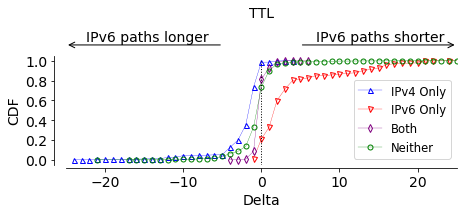

In [17]:
cdf_fig, cdf_ax = plt.subplots(figsize = (7, 2))

cdf_ax.plot(ttl_cache_v4.xs, ttl_cache_v4.ps, marker = '^', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'blue')
cdf_ax.plot(ttl_cache_v6.xs, ttl_cache_v6.ps, marker = 'v', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'red')
cdf_ax.plot(ttl_cache_both.xs, ttl_cache_both.ps, marker = 'd', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'purple')
cdf_ax.plot(ttl_cache_neither.xs, ttl_cache_neither.ps, marker = 'o', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'green')

cdf_ax.grid(False)
yticks = np.arange(0,1.1,0.2)
cdf_ax.set_yticks(yticks)
cdf_ax.set_ylim([-0.05,1.05])
cdf_ax.set_xlim([-25,25])
cdf_ax.set_xscale('linear')
cdf_ax.set_xlabel('Delta')
cdf_ax.set_ylabel('CDF')

cdf_ax.legend(["IPv4 Only", "IPv6 Only", "Both", "Neither"], fontsize = 'small', loc = 'lower right')

cdf_ax.spines['right'].set_color('none')
cdf_ax.spines['top'].set_color('none')
cdf_ax.yaxis.set_ticks_position('left')
cdf_ax.xaxis.set_ticks_position('bottom')
cdf_ax.spines['bottom'].set_position(('axes', -0.03))
cdf_ax.spines['left'].set_position(('axes', -0.03))

cdf_ax.axvline(x = 0, linewidth = 1.0, ymax = 0.95, ymin = 0, color = 'black', ls = 'dotted')

cdf_ax.annotate('', xy = (0.4, 1.1), xycoords = 'axes fraction', xytext = (0.0, 1.1), 
                arrowprops = dict(arrowstyle = '<-'))

cdf_ax.annotate('', xy = (1.0, 1.1), xycoords = 'axes fraction', xytext = (0.6, 1.1), 
                arrowprops = dict(arrowstyle = '->'))

cdf_ax.text(-22.5, 1.2, 'IPv6 paths longer')
cdf_ax.text(7, 1.2, 'IPv6 paths shorter')

cdf_ax.set_title('TTL', y = 1.30)
cdf_fig.savefig('../plots/traceroute-ttl-deltas-cache-pairs.pdf', bbox_inches='tight')
plt.show()

In [18]:
print('------ TTL V4 CACHE ------')
print('m_delta_ttl; cdf')
print('--------------------------')
for x, y in zip(ttl_cache_v4.xs, ttl_cache_v4.ps):
    print('%.2f; %.5f' % (x, y))

------ TTL V4 CACHE ------
m_delta_ttl; cdf
--------------------------
-24.00; 0.00004
-23.00; 0.00021
-22.00; 0.00042
-21.00; 0.00106
-20.00; 0.00144
-19.00; 0.00156
-18.00; 0.00186
-17.00; 0.00249
-16.00; 0.00448
-15.00; 0.00646
-14.00; 0.00823
-13.00; 0.00840
-12.00; 0.02221
-11.00; 0.02432
-10.00; 0.04011
-9.00; 0.04044
-8.00; 0.04192
-7.00; 0.04526
-6.00; 0.04792
-5.00; 0.04982
-4.00; 0.12488
-3.00; 0.19669
-2.00; 0.35007
-1.00; 0.73403
0.00; 0.98615
1.00; 0.98636
2.00; 0.99751
3.00; 0.99996
4.00; 1.00000


In [19]:
print('------ TTL V6 CACHE ------')
print('m_delta_ttl; cdf')
print('--------------------------')
for x, y in zip(ttl_cache_v6.xs, ttl_cache_v6.ps):
    print('%.2f; %.5f' % (x, y))

------ TTL V6 CACHE ------
m_delta_ttl; cdf
--------------------------
-1.00; 0.00801
0.00; 0.20840
1.00; 0.32850
2.00; 0.59792
3.00; 0.71045
4.00; 0.80048
5.00; 0.81259
6.00; 0.82774
7.00; 0.84895
8.00; 0.85003
9.00; 0.85674
10.00; 0.86302
11.00; 0.87275
12.00; 0.87773
13.00; 0.89894
14.00; 0.91322
15.00; 0.92361
16.00; 0.96126
17.00; 0.96970
18.00; 0.97468
19.00; 0.97598
20.00; 0.97814
21.00; 0.99805
22.00; 0.99870
24.00; 0.99892
26.00; 0.99913
27.00; 1.00000


In [20]:
print('------ TTL CACHE BOTH ------')
print('m_delta_ttl; cdf')
print('----------------------------')
for x, y in zip(ttl_cache_both.xs, ttl_cache_both.ps):
    print('%.2f; %.5f' % (x, y))

------ TTL CACHE BOTH ------
m_delta_ttl; cdf
----------------------------
-4.00; 0.00001
-3.00; 0.00007
-2.00; 0.00483
-1.00; 0.08402
0.00; 0.81245
1.00; 0.92939
2.00; 0.98296
3.00; 0.99856
4.00; 0.99975
5.00; 0.99997
6.00; 1.00000


In [21]:
print('------ TTL CACHE NEITHER ------')
print('m_delta_ttl; cdf')
print('-------------------------------')
for x, y in zip(ttl_cache_neither.xs, ttl_cache_neither.ps):
    print('%.2f; %.5f' % (x, y))

------ TTL CACHE NEITHER ------
m_delta_ttl; cdf
-------------------------------
-21.00; 0.00000
-17.00; 0.00000
-16.00; 0.00001
-15.00; 0.00025
-14.00; 0.00030
-13.00; 0.00048
-12.00; 0.00086
-11.00; 0.00116
-10.00; 0.00150
-9.00; 0.00348
-8.00; 0.00709
-7.00; 0.01083
-6.00; 0.01297
-5.00; 0.03156
-4.00; 0.06022
-3.00; 0.08317
-2.00; 0.13362
-1.00; 0.32879
0.00; 0.73280
1.00; 0.90111
2.00; 0.96823
3.00; 0.98003
4.00; 0.98688
5.00; 0.98902
6.00; 0.98966
7.00; 0.99083
8.00; 0.99165
9.00; 0.99447
10.00; 0.99698
11.00; 0.99712
12.00; 0.99749
13.00; 0.99817
14.00; 0.99829
15.00; 0.99842
16.00; 0.99893
17.00; 0.99902
18.00; 0.99941
19.00; 0.99953
20.00; 0.99959
21.00; 0.99962
22.00; 0.99968
23.00; 0.99988
24.00; 0.99988
25.00; 0.99991
26.00; 0.99997
27.00; 0.99998
28.00; 0.99998
32.00; 0.99999
33.00; 1.00000


In [22]:
tcp_conn_cache_v4 = Cdf.MakeCdfFromList(netflix_v4_cache['delta_connect_time'])
tcp_conn_cache_v6 = Cdf.MakeCdfFromList(netflix_v6_cache['delta_connect_time'])
tcp_conn_cache_both = Cdf.MakeCdfFromList(netflix_both_caches['delta_connect_time'])
tcp_conn_cache_neither = Cdf.MakeCdfFromList(netflix_neither_caches['delta_connect_time'])

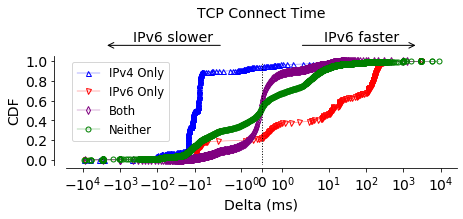

In [23]:
cdf_fig, cdf_ax = plt.subplots(figsize = (7, 2))

cdf_ax.plot(tcp_conn_cache_v4.xs, tcp_conn_cache_v4.ps, marker = '^', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'blue', markevery = 25)
cdf_ax.plot(tcp_conn_cache_v6.xs, tcp_conn_cache_v6.ps, marker = 'v', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'red', markevery = 25)
cdf_ax.plot(tcp_conn_cache_both.xs, tcp_conn_cache_both.ps, marker = 'd', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'purple', markevery = 25)
cdf_ax.plot(tcp_conn_cache_neither.xs, tcp_conn_cache_neither.ps, marker = 'o', linewidth = 0.3, markersize = 5, fillstyle = 'none', color = 'green', markevery = 25)

cdf_ax.grid(False)
yticks = np.arange(0,1.1,0.2)
cdf_ax.set_yticks(yticks)
cdf_ax.set_ylim([-0.05,1.05])
cdf_ax.set_xscale('symlog')
cdf_ax.set_xlabel('Delta (ms)')
cdf_ax.set_ylabel('CDF')

cdf_ax.legend(["IPv4 Only", "IPv6 Only", "Both", "Neither"], fontsize = 'small', loc = 'upper left')

cdf_ax.spines['right'].set_color('none')
cdf_ax.spines['top'].set_color('none')
cdf_ax.yaxis.set_ticks_position('left')
cdf_ax.xaxis.set_ticks_position('bottom')
cdf_ax.spines['bottom'].set_position(('axes', -0.03))
cdf_ax.spines['left'].set_position(('axes', -0.03))

cdf_ax.axvline(x = 0, linewidth = 1.0, ymax = 0.95, ymin = 0, color='black', ls = 'dotted')

cdf_ax.annotate('', xy = (0.4, 1.1), xycoords = 'axes fraction', xytext = (0.1, 1.1), 
                arrowprops = dict(arrowstyle = '<-'))

cdf_ax.annotate('', xy = (0.9, 1.1), xycoords = 'axes fraction', xytext = (0.6, 1.1), 
                arrowprops = dict(arrowstyle = '->'))

cdf_ax.text(-450, 1.2, 'IPv6 slower')
cdf_ax.text(7.5, 1.2, 'IPv6 faster')


cdf_ax.set_title('TCP Connect Time', y = 1.30)
cdf_fig.savefig('../plots/tcp-conn-deltas-cache-pairs.pdf', bbox_inches = 'tight')
plt.show()

In [24]:
print('------ TCP CONN V4 CACHE ------')
print('m_delta; cdf')
print('-------------------------------')
for x, y in list(zip(tcp_conn_cache_v4.xs, tcp_conn_cache_v4.ps))[0::100]:
    print('%.2f; %.5f' % (x, y))

------ TCP CONN V4 CACHE ------
m_delta; cdf
-------------------------------
-9578.07; 0.00004
-484.56; 0.00406
-150.56; 0.00817
-149.20; 0.01251
-112.39; 0.01662
-110.53; 0.02068
-108.96; 0.02503
-107.72; 0.02929
-106.15; 0.03360
-104.75; 0.03778
-103.54; 0.04201
-97.05; 0.04603
-80.04; 0.05013
-77.75; 0.05436
-73.83; 0.05850
-61.18; 0.06257
-54.05; 0.06663
-44.06; 0.07066
-34.98; 0.07476
-26.08; 0.07886
-22.93; 0.08301
-19.37; 0.08715
-16.81; 0.09126
-16.11; 0.09560
-15.84; 0.10124
-15.65; 0.10771
-15.50; 0.11834
-15.38; 0.13427
-15.26; 0.15616
-15.15; 0.17933
-15.03; 0.19221
-14.92; 0.22215
-14.82; 0.25144
-14.70; 0.26536
-14.56; 0.28371
-14.44; 0.30153
-14.30; 0.31445
-14.10; 0.32262
-13.77; 0.32849
-13.23; 0.33316
-12.74; 0.33799
-12.37; 0.34302
-12.18; 0.34889
-11.98; 0.35702
-11.83; 0.36647
-11.70; 0.37963
-11.57; 0.39054
-11.44; 0.40241
-11.32; 0.41842
-11.21; 0.43725
-11.09; 0.45190
-10.95; 0.46143
-10.82; 0.47169
-10.66; 0.48147
-10.47; 0.48904
-10.08; 0.49411
-9.53; 0.49857


In [25]:
print('------ TCP CONN V6 CACHE ------')
print('m_delta; cdf')
print('-------------------------------')
for x, y in list(zip(tcp_conn_cache_v6.xs, tcp_conn_cache_v6.ps))[0::50]:
    print('%.2f; %.5f' % (x, y))

------ TCP CONN V6 CACHE ------
m_delta; cdf
-------------------------------
-8992.64; 0.00018
-11.47; 0.00917
-9.17; 0.02068
-9.10; 0.03525
-9.04; 0.05288
-8.97; 0.07014
-8.88; 0.08219
-8.74; 0.09460
-8.57; 0.10594
-8.43; 0.11853
-7.97; 0.12806
-6.79; 0.13741
-6.65; 0.14748
-6.47; 0.15791
-6.13; 0.16799
-5.36; 0.17734
-4.59; 0.18687
-0.81; 0.19604
-0.41; 0.20558
-0.12; 0.21583
0.04; 0.22734
0.12; 0.24155
0.22; 0.25522
0.28; 0.27176
0.35; 0.28903
0.42; 0.30468
0.50; 0.32014
0.58; 0.33453
0.69; 0.34730
0.80; 0.35881
0.99; 0.36942
1.42; 0.37914
2.89; 0.38813
3.47; 0.39838
4.89; 0.40737
6.38; 0.41673
6.57; 0.42752
6.81; 0.43741
7.56; 0.44712
8.57; 0.45629
9.97; 0.46565
10.46; 0.47500
10.96; 0.48471
11.42; 0.49406
12.08; 0.50342
12.52; 0.51277
12.79; 0.52248
13.11; 0.53219
17.72; 0.54119
18.24; 0.55090
18.41; 0.56187
18.58; 0.57212
18.83; 0.58165
19.82; 0.59101
21.78; 0.60000
24.37; 0.60917
28.75; 0.61817
35.57; 0.62716
50.57; 0.63615
57.55; 0.64514
63.79; 0.65432
76.56; 0.66349
85.81; 0.6

In [26]:
print('------ TCP CONN CACHE BOTH ------')
print('m_delta; cdf')
print('---------------------------------')
for x, y in list(zip(tcp_conn_cache_both.xs, tcp_conn_cache_both.ps))[0::150]:
    print('%.2f; %.5f' % (x, y))

------ TCP CONN CACHE BOTH ------
m_delta; cdf
---------------------------------
-9007.46; 0.00000
-336.32; 0.00054
-97.12; 0.00108
-52.27; 0.00162
-37.45; 0.00216
-30.56; 0.00270
-26.54; 0.00325
-23.91; 0.00381
-22.00; 0.00437
-20.45; 0.00493
-19.25; 0.00552
-18.23; 0.00611
-17.51; 0.00671
-16.68; 0.00732
-15.93; 0.00791
-15.16; 0.00850
-14.54; 0.00912
-14.12; 0.00979
-13.64; 0.01043
-13.16; 0.01106
-12.58; 0.01169
-12.10; 0.01232
-11.75; 0.01305
-11.40; 0.01376
-11.08; 0.01444
-10.71; 0.01516
-10.40; 0.01590
-10.10; 0.01667
-9.81; 0.01738
-9.46; 0.01806
-9.17; 0.01878
-8.94; 0.01954
-8.66; 0.02034
-8.41; 0.02113
-8.17; 0.02199
-7.95; 0.02282
-7.75; 0.02377
-7.54; 0.02475
-7.36; 0.02578
-7.18; 0.02675
-6.96; 0.02768
-6.76; 0.02860
-6.53; 0.02951
-6.34; 0.03048
-6.14; 0.03152
-5.94; 0.03257
-5.77; 0.03366
-5.58; 0.03488
-5.40; 0.03612
-5.23; 0.03728
-5.06; 0.03855
-4.89; 0.03989
-4.73; 0.04131
-4.57; 0.04283
-4.41; 0.04458
-4.25; 0.04641
-4.09; 0.04817
-3.93; 0.04978
-3.77; 0.05152
-3.

In [27]:
print('------ TCP CONN CACHE NEITHER ------')
print('m_delta; cdf')
print('------------------------------------')
for x, y in list(zip(tcp_conn_cache_neither.xs, tcp_conn_cache_neither.ps))[0::500]:
    print('%.2f; %.5f' % (x, y))

------ TCP CONN CACHE NEITHER ------
m_delta; cdf
------------------------------------
-9398.26; 0.00000
-3007.89; 0.00077
-3003.68; 0.00158
-3000.93; 0.00244
-2999.81; 0.00352
-2999.02; 0.00472
-2991.98; 0.00556
-999.02; 0.00632
-303.19; 0.00708
-254.27; 0.00786
-211.16; 0.00863
-155.73; 0.00940
-136.78; 0.01017
-110.52; 0.01094
-98.45; 0.01172
-94.74; 0.01254
-91.91; 0.01339
-89.42; 0.01427
-87.93; 0.01523
-85.36; 0.01607
-83.39; 0.01695
-82.02; 0.01792
-80.71; 0.01887
-79.47; 0.01984
-77.57; 0.02073
-76.18; 0.02165
-74.62; 0.02254
-73.00; 0.02344
-69.88; 0.02425
-66.04; 0.02506
-60.64; 0.02587
-54.59; 0.02666
-50.72; 0.02748
-47.15; 0.02829
-43.91; 0.02912
-41.16; 0.02995
-39.45; 0.03088
-37.78; 0.03178
-36.28; 0.03270
-34.91; 0.03365
-33.51; 0.03457
-32.24; 0.03551
-31.15; 0.03648
-30.05; 0.03748
-28.70; 0.03842
-27.30; 0.03934
-25.98; 0.04030
-24.84; 0.04127
-23.77; 0.04229
-22.80; 0.04335
-21.99; 0.04447
-21.27; 0.04574
-20.66; 0.04724
-20.11; 0.04906
-19.58; 0.05119
-19.02; 0.05